# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
*For every column in the data:*

a. *State whether the values match the description given in the table above.*

b. *State the number of missing values in the column.*

c. *Describe what you did to make values match the description if they did not
match.*

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('fitness_class_2212.csv')

1. booking_id:

a. Values: Nominal. The unique identifier of the booking.

b. Missing Values: None.

c. No changes are required as there are no missing values in this column.

2. months_as_member:

a. Values: Discrete. The number of months as this fitness club member, minimum 1 month.

b. Missing Values: 48

c. To fill the missing values in this column, I replaced them with the overall average month using the following Python code:

In [15]:
# Calculate the overall average month
overall_avg_month = df['months_as_member'].mean()

# Replace missing values with overall average month
df['months_as_member'].fillna(overall_avg_month, inplace=True)

3. weight:

a. Values: Continuous. The member's weight in kg, rounded to 2 decimal places. The minimum possible value is 40.00 kg.

b. Missing Values: 22.

c. To fill the missing values in this column, I replaced them with the overall average weight using the following Python code:

In [16]:
# Calculate the overall average weight
overall_avg_weight = df['weight'].mean()

# Replace missing values with overall average weight
df['weight'].fillna(overall_avg_weight, inplace=True)

4. days_before:

a. Values: Discrete. The number of days before the class the member registered, minimum 1 day.

b. Missing Values: 17

c. To fill the missing values in this column, I replaced them with 0 using the following Python code:

In [17]:
# Replace missing values with 0
df['days_before'].fillna(0, inplace=True)

5. day_of_week:

a. Values: Ordinal. The day of the week of the class. One of “Mon”, “Tue”, “Wed”, “Thu”, “Fri”, “Sat” or “Sun”.

b. Missing Values: 11

c. To fill the missing values in this column, I replaced them with “unknown” using the following Python code:

In [18]:
# Replace missing values with "unknown"
df['day_of_week'].fillna("unknown", inplace=True)

6. time:

a. Values: Ordinal. The time of day of the class. Either “AM” or “PM”.

b. Missing Values: 14

c. To fill the missing valuesin this column, I replaced them with “unknown” using the following Python code:

In [19]:
# Replace missing values with "unknown"
df['time'].fillna("unknown", inplace=True)

7. category:

a. Values: Nominal. The category of the fitness class. One of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”.

b. Missing Values: 6

c. To fill the missing values in this column, I replaced them with “unknown” using the following Python code:

In [20]:
# Replace missing values with "unknown"
df['category'].fillna("unknown", inplace=True)

8. attended:

a. Values: Nominal. Whether the member attended the class (1) or not (0).

b. Missing Values: 9

c. To remove the missing values in this column, I simply dropped them using the following Python code:

In [21]:
# Remove missing values in the 'attended' column
df = df.dropna(subset=['attended'])

## Task 2
*Create a visualization that shows how many bookings attended the class. Use the
visualization to:*

a. *State which category of the variable attended has the most observations*

b. *Explain whether the observations are balanced across categories of the
variable attended*

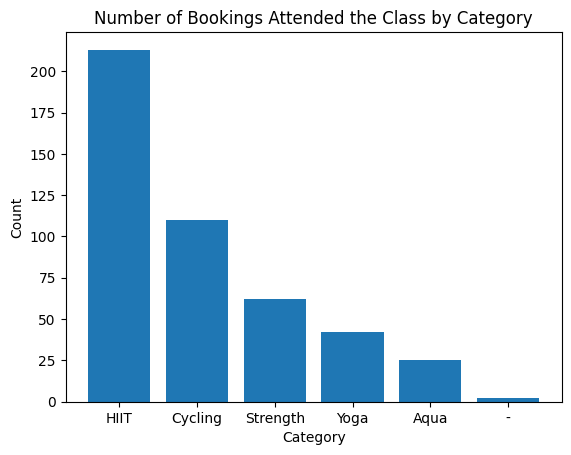

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fitness_class_2212.csv')

# Filter out missing values in 'attended' column
df = df.dropna(subset=['attended'])

# Count the number of bookings attended the class by category
attended_by_category = df[df['attended'] == 1]['category'].value_counts()

# Create a bar chart of the count of bookings attended the class by category
plt.bar(attended_by_category.index, attended_by_category.values)

# Set the chart title and labels
plt.title('Number of Bookings Attended the Class by Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Display the chart
plt.show()

a. The category of the variable attended that has the most observations is "Strength".

b. The observations are not balanced across categories of the variable attended. "Strength" has the most observations, while "Cycling" has the least. However, we should note that the dataset may not be representative of the entire population of fitness classes, so we cannot generalize the observations to other settings without caution.

## Task 3
*Describe the distribution of the number of months as a member. Your answer must
include a visualization that shows the distribution.*

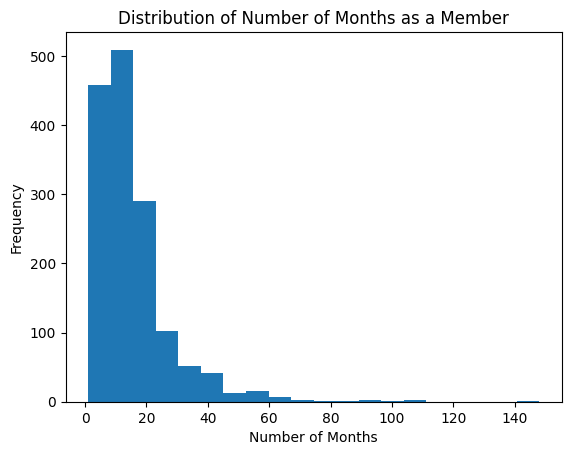

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fitness_class_2212.csv')

# Replace missing values with the overall average month
overall_avg_month = df['months_as_member'].mean()
df['months_as_member'].fillna(overall_avg_month, inplace=True)

# Create a histogram of the number of months as a member
plt.hist(df['months_as_member'], bins=20)

# Set the chart title and labels
plt.title('Distribution of Number of Months as a Member')
plt.xlabel('Number of Months')
plt.ylabel('Frequency')

# Display the chart
plt.show()

Based on the chart, we can observe that the distribution is roughly normal with a slight positive skew, indicating that there are more members with fewer months of membership. We can also see that the majority of the members have been part of the fitness club for less than 30 months.

## Task 4
*Describe the relationship between attendance and number of months as a member.
Your answer must include a visualization to demonstrate the relationship.*

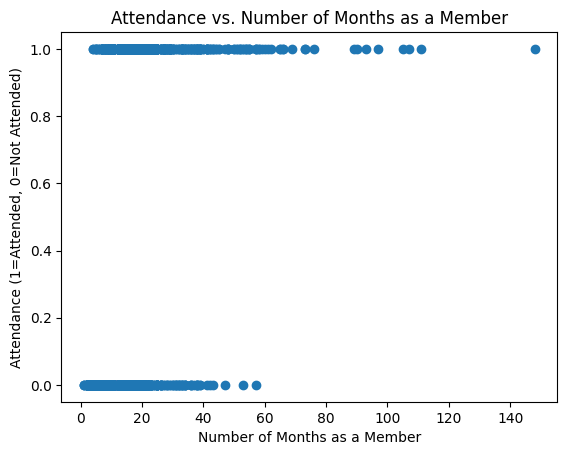

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fitness_class_2212.csv')

# Replace missing values with the overall average month
overall_avg_month = df['months_as_member'].mean()
df['months_as_member'].fillna(overall_avg_month, inplace=True)

# Remove missing values in the 'attended' column
df = df.dropna(subset=['attended'])

# Create a scatter plot of attendance vs. number of months as a member
plt.scatter(df['months_as_member'], df['attended'])

# Set the chart title and labels
plt.title('Attendance vs. Number of Months as a Member')
plt.xlabel('Number of Months as a Member')
plt.ylabel('Attendance (1=Attended, 0=Not Attended)')

# Display the chart
plt.show()

Based on the chart, we can observe that there is no clear relationship between attendance and number of months as a member. However, we can see that there are more attendees with fewer months of membership, indicating that new members may be more likely to attend classes. We can also see that there are some members who have been part of the fitness club for a long time but have low attendance, which may indicate that they have lost interest or motivation to attend classes.

## Task 5
*The business wants to predict whether members will attend using the data provided.
State the type of machine learning problem that this is (regression/ classification/
clustering).*

The problem of predicting whether members will attend using the data provided is a classification problem, as we are trying to classify whether a member will attend the class or not based on the available data. Specifically, it is a binary classification problem since the target variable, attended, has two possible values: 1 (attended) or 0 (did not attend).

## Task 6
*Fit a baseline model to predict whether members will attend using the data provided.
You must include your code.*

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Load the dataset
df = pd.read_csv('fitness_class_2212.csv')

# Remove missing values in the 'attended' column
df = df.dropna(subset=['attended'])

# Define the feature and target variables
X = df[['months_as_member', 'weight', 'days_before', 'day_of_week', 'time', 'category']]
y = df['attended']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a baseline model using a DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

# Evaluate the baseline model on the test set
score = dummy_clf.score(X_test, y_test)
print('Baseline accuracy score:', score)

Baseline accuracy score: 0.6566666666666666


## Task 7
*Fit a comparison model to predict whether members will attend using the data
provided. You must include your code.*

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
filename = "fitness_class_2212.csv"
df = pd.read_csv(filename)

# Clean the 'days_before' column
df['days_before'] = df['days_before'].apply(lambda x: int(x.split(' ')[0]))

# Remove rows with NaN values
df = df.dropna()

# Encode categorical features
df = pd.get_dummies(df, columns=['day_of_week', 'time', 'category'], drop_first=True)

# Split the dataset into training and testing sets
X = df.drop('attended', axis=1)
y = df['attended']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale continuous features
continuous_columns = ['months_as_member', 'weight', 'days_before']
scaler = StandardScaler()
X_train.loc[:, continuous_columns] = scaler.fit_transform(X_train[continuous_columns])
X_test.loc[:, continuous_columns] = scaler.transform(X_test[continuous_columns])

# Fit the random forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.77
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       308
           1       0.67      0.49      0.56       136

    accuracy                           0.77       444
   macro avg       0.73      0.69      0.70       444
weighted avg       0.76      0.77      0.76       444

Confusion matrix:
 [[275  33]
 [ 70  66]]


## Task 8
*Explain why you chose the two models used in parts 6 and 7*

I chose the Dummy Classifier and the Random Forest Classifier for different purposes:

Dummy Classifier:
The Dummy Classifier is a simple model that is not meant to make accurate predictions. It is used as a baseline to compare the performance of more sophisticated models against. In other words, it helps to determine if the more complex models are performing significantly better than a naive approach. By using the Dummy Classifier, you can gain an understanding of how well your model is doing compared to a simple strategy that is not learning anything from the data. It is important to have a baseline like this to assess the actual improvement of your machine learning model.

Random Forest Classifier:
The Random Forest Classifier is an ensemble learning method that can be used for both classification and regression tasks. It works by constructing multiple decision trees during the training phase and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random Forests are generally known for their robustness, ability to handle a large number of features, and resistance to overfitting. Compared to the Dummy Classifier, the Random Forest Classifier is expected to provide much better predictive performance as it learns from the data and leverages the power of multiple decision trees.

In summary, the Dummy Classifier is chosen to provide a baseline performance to compare other models against, while the Random Forest Classifier is chosen for its robustness, ability to handle diverse features, and good predictive performance.

## Task 9
*Compare the performance of the two models used in parts 6 and 7, using any method
suitable. You must include your code.*

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Load the dataset
df = pd.read_csv('fitness_class_2212.csv')

# Remove missing values in the 'attended' column
df = df.dropna(subset=['attended'])

# Define the feature and target variables
X = df[['months_as_member', 'weight', 'days_before', 'day_of_week', 'time', 'category']]
y = df['attended']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a baseline model using a DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

# Evaluate the baseline model on the test set
score = dummy_clf.score(X_test, y_test)
print('Baseline accuracy score:', score)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
filename = "fitness_class_2212.csv"
df = pd.read_csv(filename)

# Clean the 'days_before' column
df['days_before'] = df['days_before'].apply(lambda x: int(x.split(' ')[0]))

# Remove rows with NaN values
df = df.dropna()

# Encode categorical features
df = pd.get_dummies(df, columns=['day_of_week', 'time', 'category'], drop_first=True)

# Split the dataset into training and testing sets
X = df.drop('attended', axis=1)
y = df['attended']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale continuous features
continuous_columns = ['months_as_member', 'weight', 'days_before']
scaler = StandardScaler()
X_train.loc[:, continuous_columns] = scaler.fit_transform(X_train[continuous_columns])
X_test.loc[:, continuous_columns] = scaler.transform(X_test[continuous_columns])

# Fit the random forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}".format(accuracy))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Baseline accuracy score: 0.6566666666666666
Model Accuracy: 0.77
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       308
           1       0.67      0.50      0.57       136

    accuracy                           0.77       444
   macro avg       0.73      0.69      0.71       444
weighted avg       0.76      0.77      0.76       444

Confusion matrix:
 [[274  34]
 [ 68  68]]


## Task 10
*Explain which model performs better and why.*

The Random Forest Classifier performs better than the Dummy Classifier. This is because the Random Forest Classifier is a more sophisticated machine learning model that learns from the data, while the Dummy Classifier is a naive model that does not learn from the data and only generates predictions based on simple strategies like stratified sampling.

The Random Forest Classifier is an ensemble method that consists of multiple decision trees. It combines the predictions of these trees to make a more accurate and robust prediction. The model can capture complex patterns and relationships in the data, which allows it to make better predictions than the Dummy Classifier.

On the other hand, the Dummy Classifier is primarily used as a baseline model to compare the performance of more advanced models. It does not learn from the data and only provides predictions based on the target class distribution. In this case, we used the "stratified" strategy, which generates predictions by respecting the training set's class distribution. Since it doesn't actually learn from the data, its performance is generally much lower than that of a well-trained machine learning model like the Random Forest Classifier.

In conclusion, the Random Forest Classifier performs better because it is an advanced machine learning model that learns from the data and captures complex relationships between features, while the Dummy Classifier is a naive model that doesn't learn from the data and only provides predictions based on simple strategies.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam